<a href="https://colab.research.google.com/github/gopiprasad008/gopipprasad/blob/main/RFM_ANAYLSICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Most basic stuff for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.figure_factory as ff
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import the dataset from system and for EDA analytics
df = pd.read_csv("/content/sales_data.csv")
df.head(10)

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,30-Dec-16,24-Oct-21,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,31-Mar-18,24-Oct-21,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,30-Nov-17,24-Oct-21,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,09-Apr-19,24-Oct-21,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,23-Oct-20,24-Oct-21,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
5,153,49,5841.24,119.21,96.84,1.98,26-Jul-15,24-Oct-21,46.57,1,...,1595.97,1447.96,0,20,23,6,0.00,2482.33,2759.43,599.48
6,187,43,5470.27,127.22,128.77,2.99,14-Jan-19,24-Oct-21,23.58,1,...,2042.31,2699.47,2,0,19,22,47.00,0.00,2578.28,2844.99
7,219,54,5200.53,96.31,237.53,4.40,19-Nov-19,24-Oct-21,13.06,1,...,754.72,1339.16,2,22,24,6,273.18,2328.21,1980.99,618.15
8,258,19,4967.06,261.42,51.91,2.73,03-Mar-21,24-Oct-21,12.37,1,...,2588.19,563.74,1,0,8,10,332.19,0.00,1673.10,2961.77
9,308,21,4726.38,225.07,63.88,3.04,06-Jan-20,24-Oct-21,31.29,1,...,1094.98,991.97,4,11,6,0,1095.98,1867.94,1762.46,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   TOTAL_ORDERS               5000 non-null   int64  
 2   REVENUE                    5000 non-null   float64
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64
 4   CARRIAGE_REVENUE           5000 non-null   float64
 5   AVERAGESHIPPING            5000 non-null   float64
 6   FIRST_ORDER_DATE           5000 non-null   object 
 7   LATEST_ORDER_DATE          5000 non-null   object 
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64
 9   DAYSSINCELASTORDER         5000 non-null   int64  
 10  MONDAY_ORDERS              5000 non-null   int64  
 11  TUESDAY_ORDERS             5000 non-null   int64  
 12  WEDNESDAY_ORDERS           5000 non-null   int64  
 13  THURSDAY_ORDERS            5000 non-null   int64

In [5]:
# change the date and time to pandas datetime 
df['FIRST_ORDER_DATE'] = pd.to_datetime(df['FIRST_ORDER_DATE'])
df['LATEST_ORDER_DATE'] = pd.to_datetime(df['LATEST_ORDER_DATE'])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5000.0,40709.227800,49949.848017,1.00,1687.5000,13765.000,71891.5000,277160.00
TOTAL_ORDERS,5000.0,12.870400,12.679880,1.00,3.0000,8.000,20.0000,156.00
REVENUE,5000.0,1681.523840,1998.618678,38.50,315.0975,966.725,2493.0725,34847.40
AVERAGE_ORDER_VALUE,5000.0,136.537378,91.651569,10.68,83.0250,113.160,160.2725,1578.88
CARRIAGE_REVENUE,5000.0,46.036376,47.879226,0.00,9.9800,24.985,76.8625,529.59
AVERAGESHIPPING,5000.0,3.592574,2.021360,0.00,2.5000,3.660,4.7900,35.99
AVGDAYSBETWEENORDERS,5000.0,163.159618,259.699496,0.00,21.6700,57.635,170.3575,1409.50
DAYSSINCELASTORDER,5000.0,87.420000,80.156513,1.00,7.0000,68.000,171.2500,207.00
MONDAY_ORDERS,5000.0,1.629000,2.236506,0.00,0.0000,1.000,2.0000,19.00
TUESDAY_ORDERS,5000.0,1.754400,2.433940,0.00,0.0000,1.000,3.0000,23.00


In [9]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
df['Month'] = df['LATEST_ORDER_DATE'].apply(get_month)
grouping = df.groupby('CustomerID')['Month']
df['CohortMonth'] = grouping.transform('min')
df.tail()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,InvoiceMonth,CohortMonth,Month
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,1,0.0,0.0,0.00,117.49,2021-04-01,2021-04-01,2021-04-01
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,1,0.0,0.0,0.00,117.49,2021-04-01,2021-04-01,2021-04-01
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,1,0.0,0.0,0.00,117.49,2021-04-01,2021-04-01,2021-04-01
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,1,0,0.0,0.0,117.49,0.00,2021-04-01,2021-04-01,2021-04-01
4999,200783,2,94.14,47.07,9.94,4.97,2014-06-26,2021-04-01,1235.5,207,...,0,1,1,0.0,0.0,44.19,49.95,2021-04-01,2021-04-01,2021-04-01


In [10]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'Month')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [14]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1
CohortMonth,
2021-04-01,1192
2021-05-01,256
2021-06-01,349
2021-07-01,440
2021-08-01,465
2021-09-01,532
2021-10-01,1766


In [15]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 

CohortIndex,1
CohortMonth,
2021-04-01,100.0
2021-05-01,100.0
2021-06-01,100.0
2021-07-01,100.0
2021-08-01,100.0
2021-09-01,100.0
2021-10-01,100.0


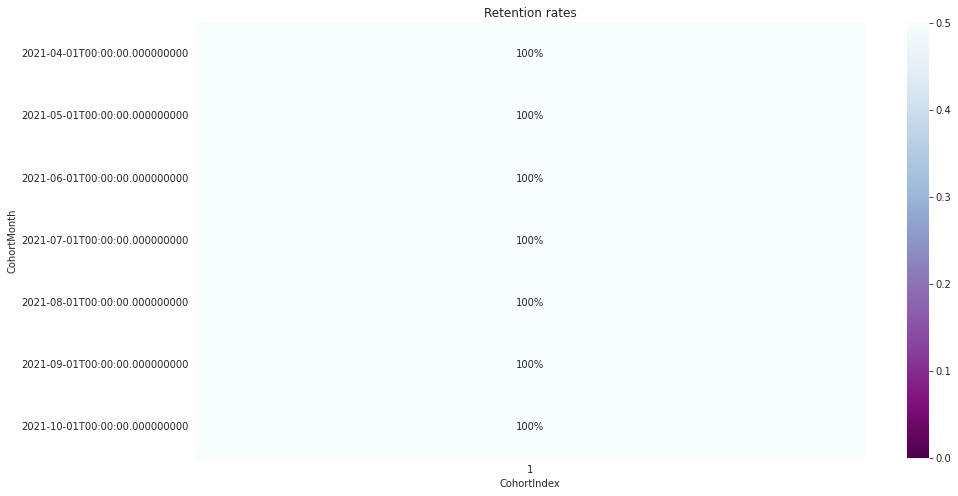

In [16]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

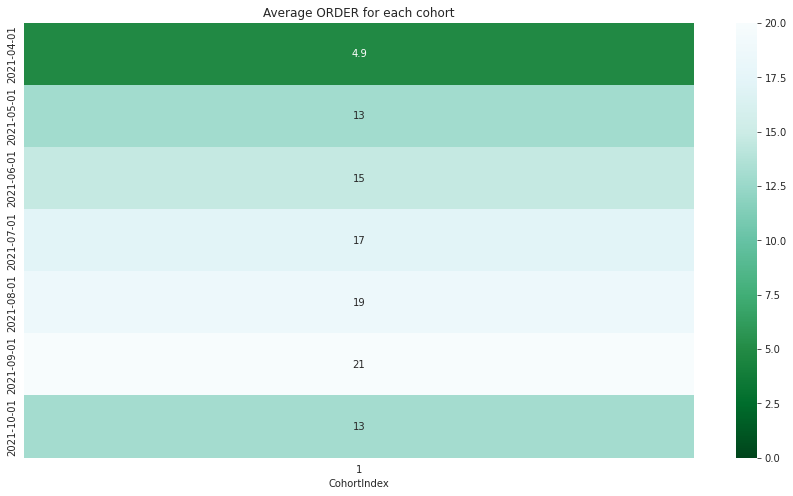

In [58]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['TOTAL_ORDERS'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='TOTAL_ORDERS')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average ORDER for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

In [59]:
snapshot_date = df['LATEST_ORDER_DATE'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2021-10-25 00:00:00')

In [60]:
rfm = df.groupby(['CustomerID']).agg({'LATEST_ORDER_DATE': lambda x : (snapshot_date - x.max()).days,
                                      'TOTAL_ORDERS':'count','REVENUE': 'sum'})

#Rename columns
rfm.rename(columns={'LATEST_ORDER_DATE':'Recency','TOTAL_ORDERS':'Frequency','REVENUE':'MonetaryValue'}
           ,inplace= True)

#Final RFM values
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
1,53,1,34847.40
2,94,1,32486.98
3,53,1,24178.97
4,5,1,18554.49
5,130,1,16884.99


In [49]:
rfm['Frequency'].value_counts()duplicates="drop"

1    5000
Name: Frequency, dtype: int64

In [63]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(0,1)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
#f_quartiles = rfm['Frequency'],1,labels = r_labels 
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
1,53,1,34847.40,3,NaN,4,3nan4,7.0
2,94,1,32486.98,2,NaN,4,2nan4,6.0
3,53,1,24178.97,3,NaN,4,3nan4,7.0
4,5,1,18554.49,4,NaN,4,4nan4,8.0
5,130,1,16884.99,2,NaN,4,2nan4,6.0


In [64]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
1nan1    702
3nan4    590
4nan2    502
2nan3    437
3nan3    437
dtype: int64

In [65]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
2.0         206.1       1.0         191.3   702
3.0         178.8       1.0         441.0   499
4.0         126.7       1.0         778.9   420
5.0          67.9       1.0        1199.4  1003
6.0          45.3       1.0        2122.7  1355
7.0          23.3       1.0        3388.0   855
8.0           3.6       1.0        4519.0   166

In [67]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'champions'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Potential customers'
    else:  
        return 'need attention'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                       mean      mean          mean count
General_Segment                                          
Potential customers    34.5       1.0        2745.4  2376
need attention        135.4       1.0         718.2  2624

In [68]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency  Frequency  MonetaryValue
count  5000.000000     5000.0    5000.000000
mean     87.420000        1.0    1681.523840
std      80.156513        0.0    1998.618678
min       1.000000        1.0      38.500000
25%       7.000000        1.0     315.097500
50%      68.000000        1.0     966.725000
75%     171.250000        1.0    2493.072500
max     207.000000        1.0   34847.400000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt you

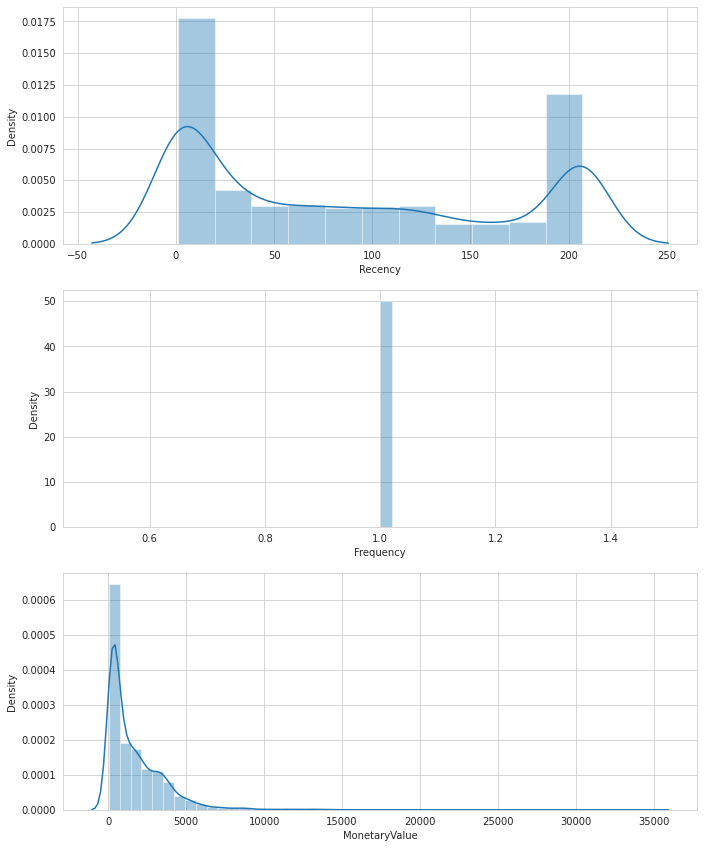

In [69]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt you

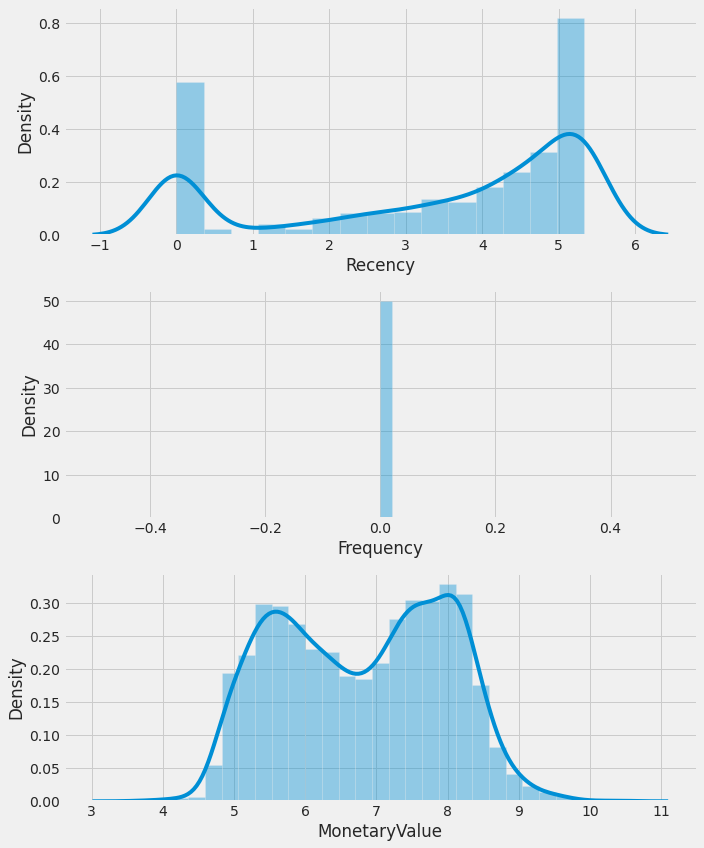

In [71]:
#Unskew the data with log transformation
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)
#or rfm_log = np.log(rfm_rfm)


# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

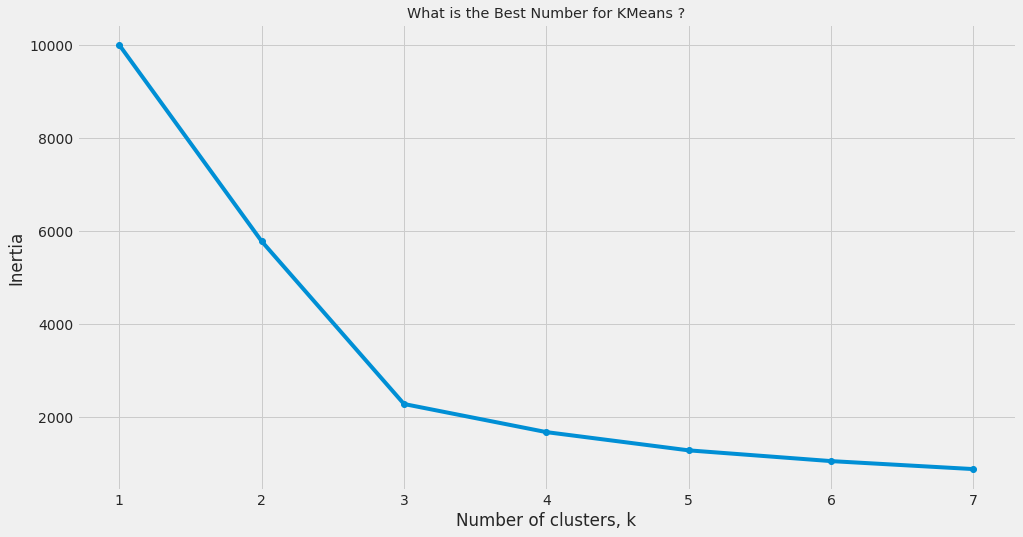

In [73]:
from sklearn.cluster import KMeans

#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [74]:
# clustering
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0             1.0       1.0         740.0  1129
1           169.0       1.0         344.0  1587
2            73.0       1.0        3076.0  2284

In [76]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_rfm.index,columns=rfm_rfm.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['General_Segment'] = rfm['General_Segment']
rfm_normalized.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','General_Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
rfm_melt.head(10)

,CustomerID,General_Segment,K_Cluster,Metric,Value
0,1,Potential customers,2,Recency,0.578668
1,2,Potential customers,2,Recency,0.293354
2,3,Potential customers,2,Recency,-0.882257
3,4,Potential customers,2,Recency,0.740495
4,5,Potential customers,2,Recency,0.042398
5,6,Potential customers,2,Recency,0.683731
6,7,Potential customers,2,Recency,0.371529
7,8,Potential customers,2,Recency,0.665805
8,9,Potential customers,2,Recency,-0.406236
9,10,Potential customers,2,Recency,0.212192


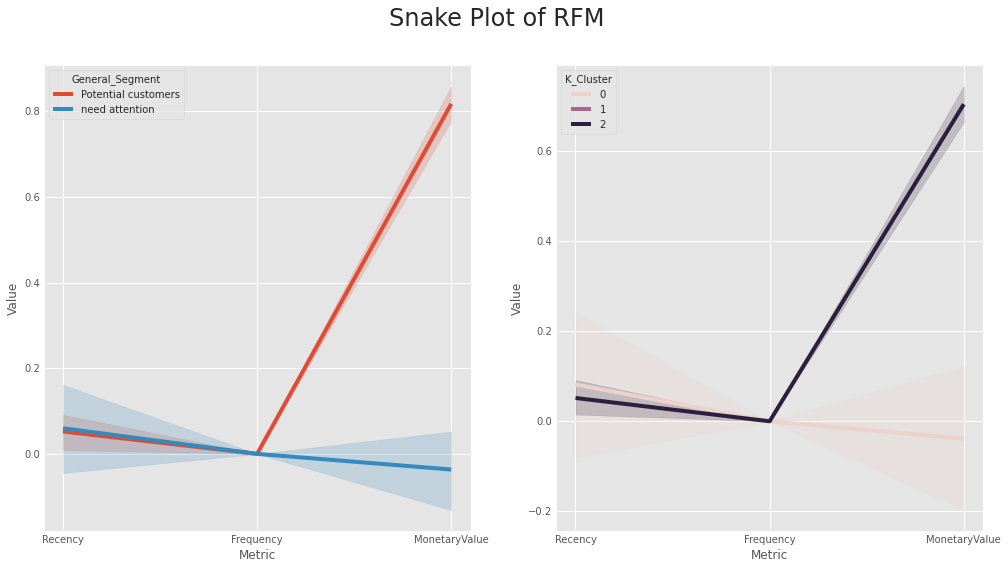

In [77]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [78]:
cluster_avg = rfm_rfm_k3.groupby(['K_Cluster']).mean()
population_avg = rfm_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,-0.98,0.0,-0.56
1,0.94,0.0,-0.80
2,-0.16,0.0,0.83


In [79]:
 #the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,MonetaryValue
General_Segment,,,
Potential customers,-0.61,0.0,0.63
need attention,0.55,0.0,-0.57


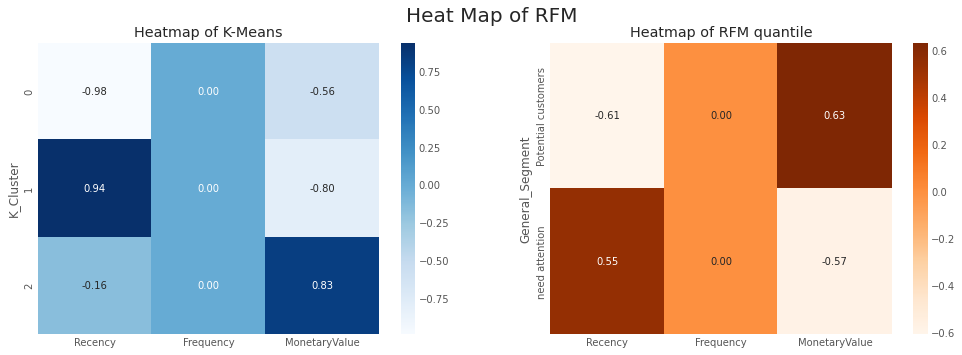

In [81]:
# heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

# a snake plot with K-Means
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")

plt.suptitle("Heat Map of RFM",fontsize=20) #make title fontsize subtitle 

plt.show()